# Branded chart demo

- how to define a color palette for your chart elements, e.g. using the RGB colors defined by your company
- how to add a company logo to a chart
- how to add a title
- how to safe a chart to a file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.ticker as mtick
import openpyxl

from PIL import Image
import requests
from io import BytesIO


In [2]:

rs = np.random.RandomState(364)
values = rs.randn(364, 4).cumsum(axis=0)
values = np.insert(values, 0, [0,0,0,0], axis=0)
dates = pd.date_range("1 1 2020", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["Roche AG", "Sonova AG", "Biogen Ltd.", "Amgen Inc."])
data = data.rolling(7).mean()



In [3]:
%matplotlib inline

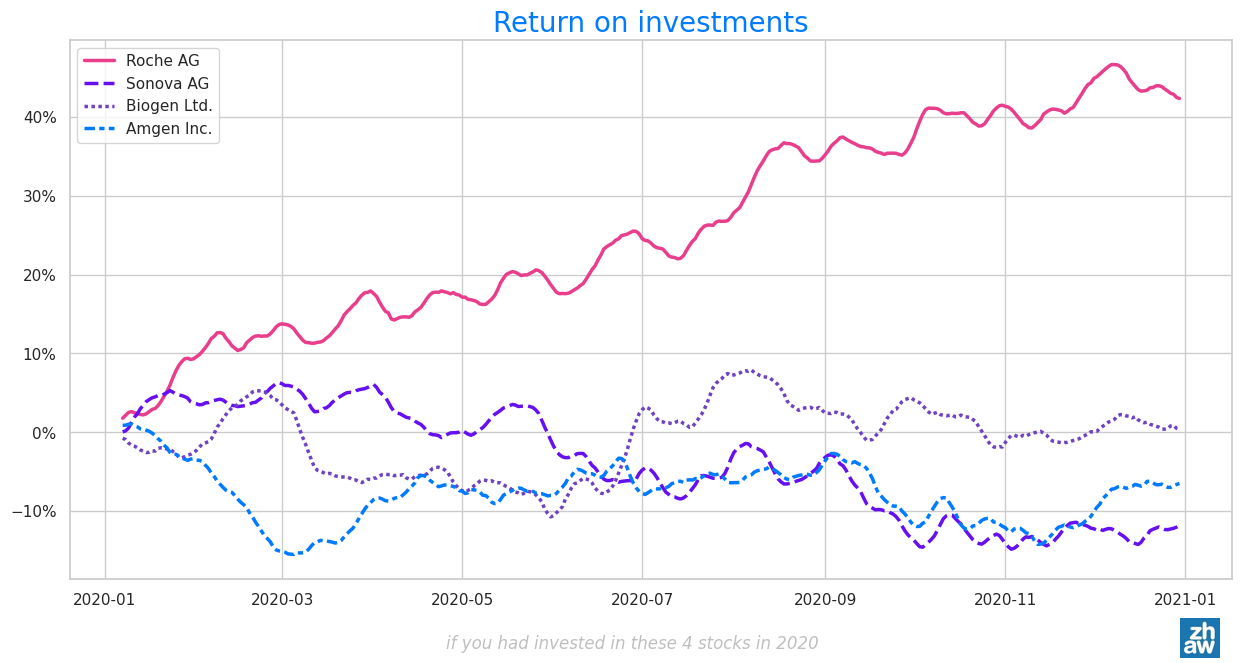

In [4]:

sns.set_theme(style="whitegrid")
# Remap the default palette to your companies colors using hex codes
my_palette = ["#007bff", "#6610f2","#6f42c1","#e83e8c"]
color_codes_wanted = ['blue', 'mauve', 'violet', 'red']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in my_palette]))
mcolors.get_named_colors_mapping().update(cdict)

ax = sns.lineplot(data=data,  linewidth=2.5, palette=['red', 'mauve', 'violet', 'blue'])

# format the y axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# adjust the size of the chart
fig = plt.gcf()
fig.set_size_inches(15,7)

# add a title, set the font size and color
ax.set_title("Return on investments", color="blue", fontsize=20)

plt.figtext(0.5, 0.01, 'if you had invested in these 4 stocks in 2020', wrap=True, horizontalalignment='center', fontsize=12, color='grey', alpha=0.5, fontstyle='italic')

# add your company logo to the chart from an image url
response = requests.get('https://nico.nexgate.ch/images/logo.jpg')
img = Image.open(BytesIO(response.content))
# resize the image to 40x40 pixels
img = img.resize((40, 40))
# position the logo on the bottom right and adjust the transparency
plt.figimage(img, 1180, 5, zorder=3, alpha=.9)
plt.show();

# save the chart as a png file
fig.savefig('../images/chart.png', dpi=fig.dpi)


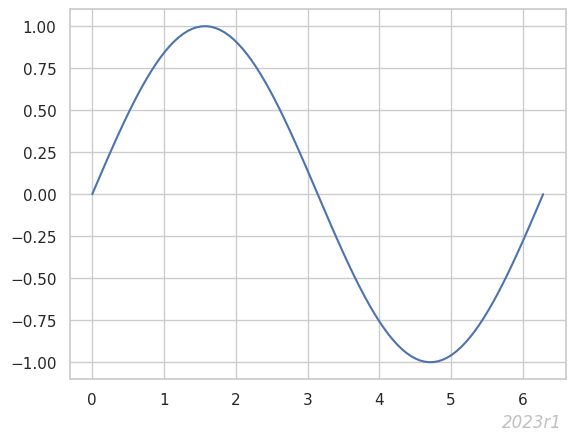

In [5]:
import numpy as np
from matplotlib import pyplot as plt
# draw a sinusoide
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x, y)

plt.figtext(0.8, 0.01, '2023r1', wrap=True, fontsize=12, color='grey', alpha=0.5, fontstyle='italic')
plt.show()
